# Prerequisites


* csv
* matplotlib.pyplot
* numpy
* LinearRegression (sklearn.linear_model)
* sem (scipy.stats)
* scipy.stats


In [31]:
import csv
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from scipy.stats import sem
import scipy.stats as stats

# 1. Frequency of Listening Music vs. Duration of Study


## Opening "survey.csv" file and read

In [32]:
f1 = open("/content/drive/MyDrive/C3Coding Data Analysis/survey.CSV", "r", encoding = "UTF-8")
d1 = csv.reader(f1)

freq, duration = [], []

next(d1)

for row in d1:
  freq.append(int(row[1]))
  duration.append(float(row[2]))

# print(freq, duration, sep = '\n\n')

f1.close()

## Linear Regression Analysis

In [33]:
# Creating a regression line (ax + b)

x = np.array(freq).reshape((-1, 1))   # independent variables
y = np.array(duration)                # dependent variables

model = LinearRegression().fit(x, y)

r_sq = model.score(x, y)
a = model.coef_
b = model.intercept_

print(f"Coefficient of Determination: {r_sq}")  # 결정계수
print(f"Slope: {a}")
print(f"Intercept: {b}")

Coefficient of Determination: 0.13574457227150494
Slope: [1.944416]
Intercept: 44.452301999999996


# 2. Lyrical vs. Non-lyrical Music

### Open and Read "lyrics.csv" file

In [34]:
f2 = open("/content/drive/MyDrive/C3Coding Data Analysis/lyrics.CSV", 'r', encoding = "UTF-8")
d2 = csv.reader(f2)

next(d2) # remove header

nonlyrical, lyrical = [], []

for row in d2:
	if row[0] == "Non-lyrical":
		nonlyrical.append(np.array(row[1:]).astype(np.int_))  # Convert all element type to integer
	elif row[0] == "Lyrical":
		lyrical.append(np.array(row[1:]).astype(np.int_))      # Convert all element type to integer

nonlyrical = np.array(nonlyrical)
lyrical = np.array(lyrical)

# Independent t-test

eq_var = stats.ttest_ind(nonlyrical, lyrical, equal_var=True)
print(eq_var)       # Assume variances are equal

noneq_var = stats.ttest_ind(nonlyrical, lyrical, equal_var=False)
print(noneq_var)    # Assume variances are NOT equal


Ttest_indResult(statistic=array([0.27975144, 0.13416408, 1.26201036]), pvalue=array([0.78285756, 0.89476155, 0.22305317]))
Ttest_indResult(statistic=array([0.27775099, 0.13429172, 1.22797345]), pvalue=array([0.7846139 , 0.89472323, 0.23860795]))


# 3. Classification Analysis

## Open and Read "classification.csv" file

In [35]:
f3 = open("/content/drive/MyDrive/C3Coding Data Analysis/classification.CSV", 'r', encoding = "UTF-8")
d3 = csv.reader(f3)

next(d3)

tot, names = [], []

for row in d3:
  names.append(row[0])
  tot.append(int(row[1]))

how_names = names[:5]
how = tot[:5]

will_names = names[5:]
will = tot[5:]

## Graph Representations

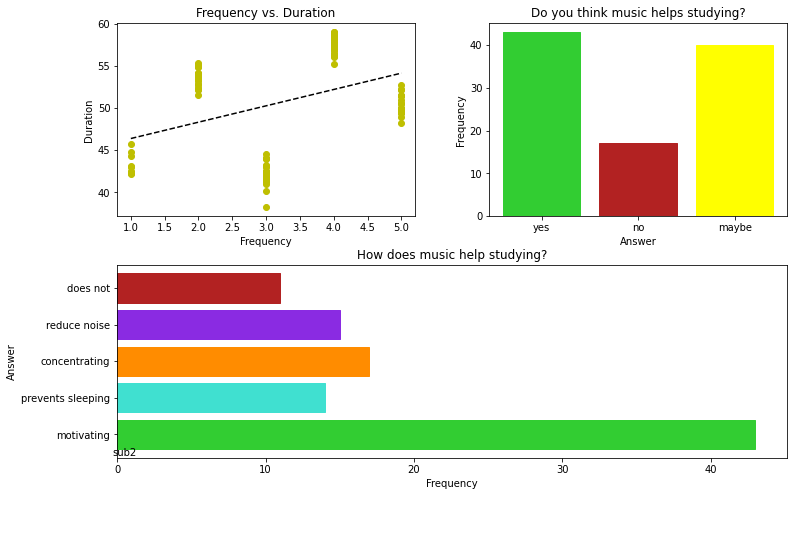

In [50]:
fig = plt.figure(figsize=(12, 8))
plt.subplots_adjust(wspace = 0.25, hspace = 0.25)

# Regression Plot Prep

coef = np.polyfit(freq, duration, 1)
poly1d_fn = np.poly1d(coef)

# Classification Plot Prep

colors = ['limegreen', 'turquoise', 'darkorange', 'blueviolet', 'firebrick']

## Linear Regression Plot

sub1 = fig.add_subplot(2, 2, 1)
plt.annotate('sub1', xy = (0.5, -0.5), va = 'center', ha = 'center')
sub1.plot(freq, duration, 'yo', freq, poly1d_fn(freq), '--k')
sub1.set_title("Frequency vs. Duration")
sub1.set_xlabel("Frequency")
sub1.set_ylabel("Duration")

## How does music help studying?

sub2 = fig.add_subplot(2, 2, (3, 4))
plt.annotate('sub2', xy = (0.5, -0.5), va = 'center', ha = 'center')
barlist1 = sub2.barh(how_names, how)
for i in range(len(barlist1)):
	barlist1[i].set_color(colors[i])
sub2.set_title("How does music help studying?")
sub2.set_xlabel("Frequency")
sub2.set_ylabel("Answer")

## Do you think music helps studying?

sub3 = fig.add_subplot(2, 2, 2)
plt.annotate('sub3', xy = (0.5, -0.5), va = 'center', ha = 'center')
barlist2 = sub3.bar(will_names, will)
barlist2[0].set_color('limegreen')
barlist2[1].set_color('firebrick')
barlist2[2].set_color('yellow')
sub3.set_title("Do you think music helps studying?")
sub3.set_xlabel("Answer")
sub3.set_ylabel("Frequency")

plt.show()